In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


In [15]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [16]:
dirs = '/kaggle/input/nlp-getting-started/'

In [17]:
data = pd.read_csv(dirs+"train.csv")

In [18]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
data.tail(60)

,id,keyword,location,text,target
7553,10798,wrecked,NaN,#news Cramer: Iger's 3 words that wrecked Disn...,0
7554,10799,wrecked,NaN,James Kunstler: How bad architecture wrecked c...,0
7555,10800,wrecked,Milwaukee County,http://t.co/DeQQOpSP4f: Iger's 3 words that wr...,0
7556,10802,wrecked,"Click the link below, okay",The Twitter update pretty much wrecked the app,0
7557,10803,wrecked,NaN,You wrecked me. Never felt so low in my life. ...,0
7558,10805,wrecked,probably not home,coleslaw #wrecked http://t.co/sijNBmCZIJ,0
7559,10808,wrecked,NaN,300K exotic car wrecked in train accident \nht...,1
7560,10809,wrecked,NaN,The twins pitcher's ego is now WRECKED,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0
7562,10811,wrecked,NaN,you wrecked my whole world,0


In [20]:
data[data['keyword'].notnull() & data['location'].notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [21]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

# SMALL ANALYSIS

Total % of Negative and Positives are: 


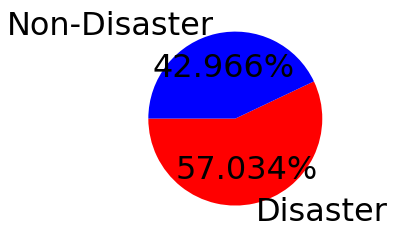

In [22]:
print("Total % of Negative and Positives are: ")
plt.pie(data['target'].value_counts(),
        labels=['Disaster','Non-Disaster'],
        colors=['r','b'],
       autopct='%.3f%%',
       startangle=180)
plt.show()

In [23]:
keywords = [] #getting all keywords 
keyword_count = [] #getting all keywords count
def count_keywords(x):
    if x not in keywords:
        keywords.append(x)
        keyword_count.append(len(data[data['keyword']==x]))
data.keyword.apply(count_keywords)

0       None
1       None
2       None
3       None
4       None
        ... 
7608    None
7609    None
7610    None
7611    None
7612    None
Name: keyword, Length: 7613, dtype: object

[]

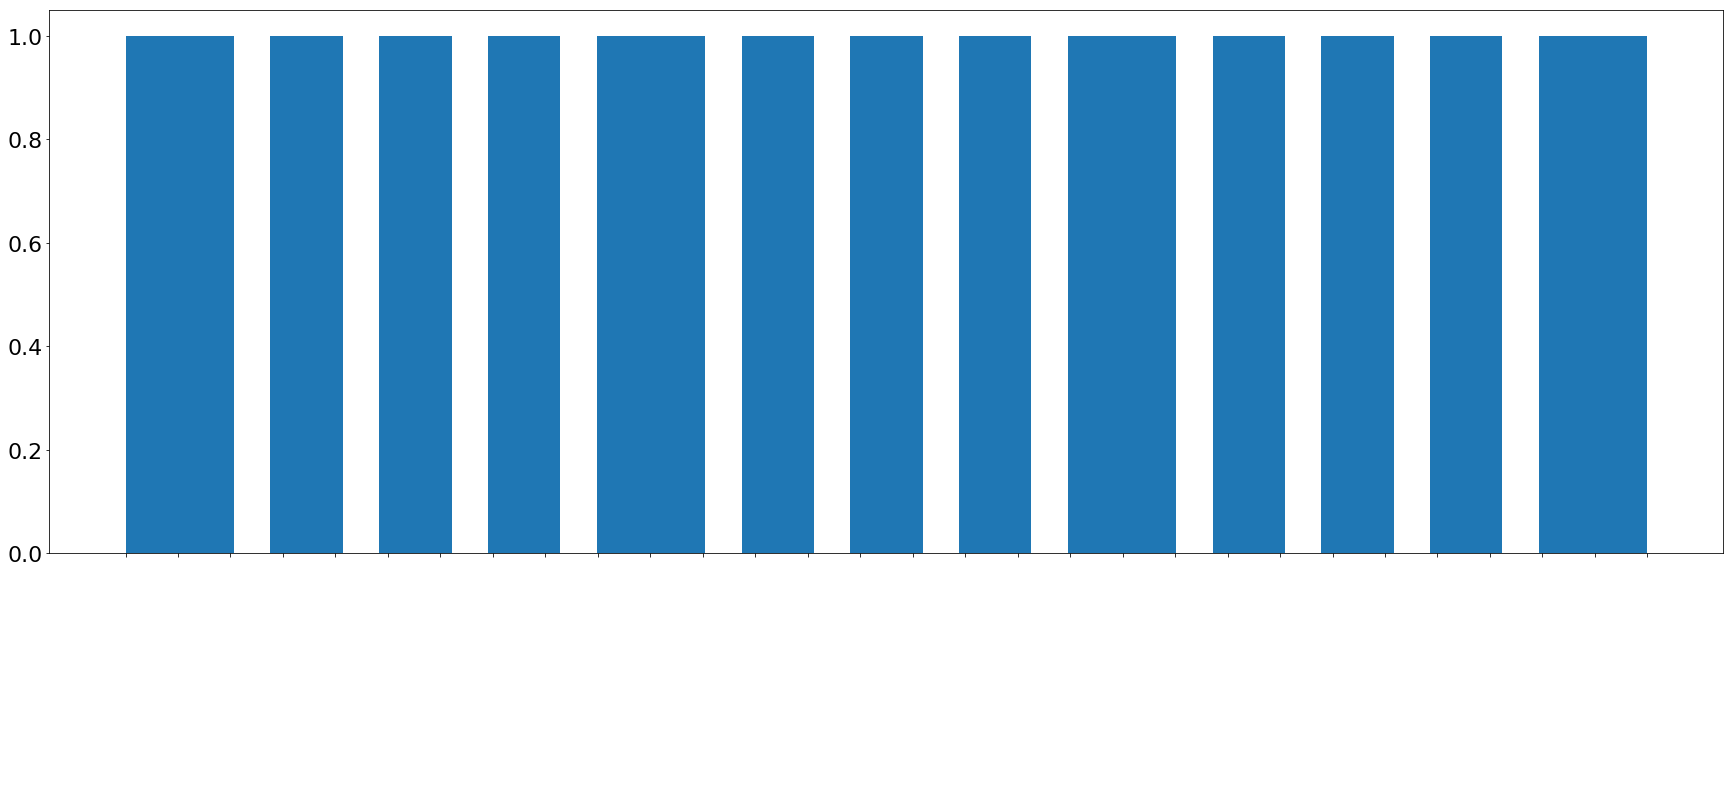

In [24]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size':22})
plt.hist(keywords[:30],max(keyword_count[:30]))
plt.xticks(rotation='vertical',color='w')
plt.plot()

### Removing All NaN Columns

In [25]:
without_nan = data[data['keyword'].notnull() & data['location'].notnull()]

In [26]:
without_nan

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [27]:
lens = without_nan.text.str.len()

In [28]:
print("MEAN is {}".format(np.mean(lens)),
      "Median is {}".format(np.median(lens)),
      "Max length tweet is {}".format(max(lens)),sep='\n')

MEAN is 102.31988188976378
Median is 109.0
Max length tweet is 152


### Histogram of the lengths of all texts 

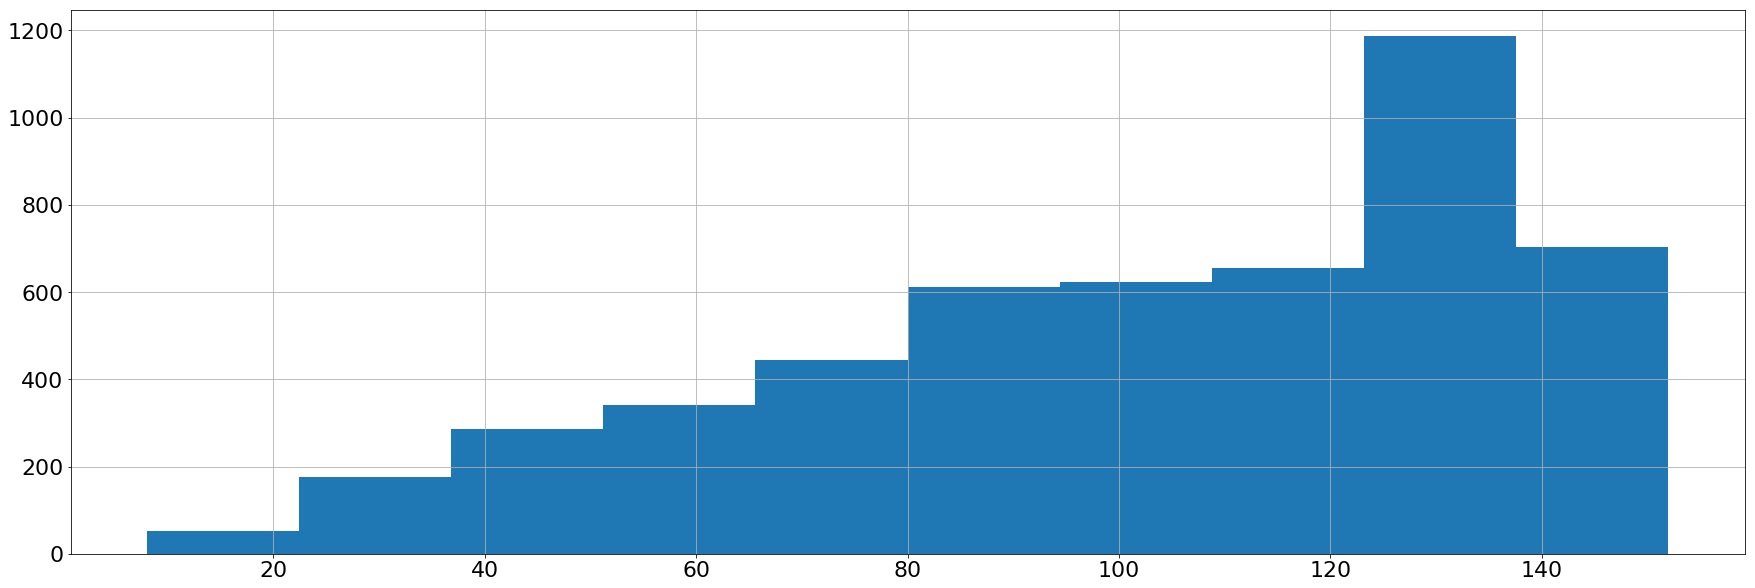

In [29]:
plt.figure(figsize=(30,10))
lens.hist()

### Deep Learning AND  Machine Learning Part

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [31]:
def RemoveEmojis(x):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',x)

In [32]:
removed = without_nan.text.apply(RemoveEmojis)

In [33]:
without_nan.text = removed

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


#### Removing Stop Words

In [35]:
stop_words = set(stopwords.words('english'))

In [36]:
stop_words #all stop words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Lemmatization with stop Words Removal

In [37]:
lemmer = WordNetLemmatizer()

In [38]:

def RemovingStopWords(text):
    x = []
    tokens = word_tokenize(text)
    for token in tokens:
        lemmered_token = lemmer.lemmatize(token)
        x.append(lemmered_token)
    removed_words = [i for i in x if i not in stop_words]
    return TreebankWordDetokenizer().detokenize(removed_words)

In [39]:
stoped_words = without_nan.text.apply(RemovingStopWords)

In [40]:
stoped_words

31      @ bbcmtd Wholesale Markets ablaze http://t.co/...
32      We always try bring heavy . #metal #RT http://...
33      # AFRICANBAZE:Breaking news:Nigeria flag set a...
34                                      Crying!Set ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7575      On bright side I wrecked http://t.co/uEa0txRHYs
7577    @ widda16...He's gone . You relax . I thought ...
7579    Three day work've pretty much wrecked hahaha s...
7580    # FX #forex #trading Cramer:Iger's 3 word wrec...
7581    @ engineshed Great atmosphere British Lion gig...
Name: text, Length: 5080, dtype: object

In [41]:
without_nan.text=stoped_words

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
without_nan

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@ bbcmtd Wholesale Markets ablaze http://t.co/...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try bring heavy . #metal #RT http://...,0
33,50,ablaze,AFRICA,# AFRICANBAZE:Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying!Set ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On bright side I wrecked http://t.co/uEa0txRHYs,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@ widda16...He's gone . You relax . I thought ...,0
7579,10831,wrecked,"Vancouver, Canada",Three day work've pretty much wrecked hahaha s...,0
7580,10832,wrecked,London,# FX #forex #trading Cramer:Iger's 3 word wrec...,0


In [43]:
input_data = without_nan.text #input Data

In [44]:
labels = without_nan.target #input Labels

# Applying on Recurrent Neural Network

In [45]:
tokens = Tokenizer(num_words=10000)
tokens.fit_on_texts(input_data)

In [46]:
padded_text = tokens.texts_to_sequences(input_data) #Transforming each text to a sequence of integers

In [47]:
padded_text

[[5193, 2103, 5194, 474, 3, 2, 1, 5195],
 [94, 298, 778, 838, 649, 1048, 77, 3, 2, 1, 5196],
 [5197, 243, 22, 1796, 612, 192, 474, 970, 3, 2, 1, 5198],
 [5199, 192, 474],
 [117, 1797, 576, 47, 186, 5, 892, 95, 256, 89, 734, 474, 3, 2, 1, 5200],
 [5201, 5202, 1576, 110, 5203, 309, 11, 3395, 4, 2104, 192, 5204, 474, 893],
 [3396, 971, 3397, 192, 474, 3, 2, 1, 5205],
 [474, 650, 577],
 [193, 3, 2, 1, 3398, 3, 2, 1, 3399, 3, 2, 1, 3400, 3, 2, 1, 3401, 3402],
 [839,
  972,
  29,
  5206,
  3403,
  194,
  971,
  5207,
  686,
  474,
  613,
  3404,
  5208,
  1049,
  356,
  21],
 [123, 509, 6, 409, 2105, 187, 474, 78, 779, 3, 2, 1, 5209],
 [193, 3, 2, 1, 3398, 3, 2, 1, 3399, 3, 2, 1, 3400, 3, 2, 1, 3401, 3402],
 [48,
  256,
  5210,
  134,
  1379,
  1380,
  441,
  13,
  614,
  4,
  2593,
  135,
  1246,
  256,
  155,
  30,
  543],
 [3405, 38, 384, 3406, 63, 192, 474, 3, 2, 1, 5211],
 [38, 1381, 13, 1798, 30, 5212, 1247, 474, 2594, 3, 2, 1, 5213],
 [2106,
  2107,
  651,
  194,
  475,
  5214,
  25,


In [48]:
sent = without_nan.text

In [49]:
r = []
for index,i in enumerate(sent):
    #print(i)
    x = word_tokenize(i)
    r.append(len(x))
    
print("The max length of the sentence is {}".format(max(r)))
max_len = max(r)

The max length of the sentence is 70


In [50]:
padded_text = pad_sequences(padded_text,maxlen=max_len)

In [51]:
padded_text

array([[   0,    0,    0, ...,    2,    1, 5195],
       [   0,    0,    0, ...,    2,    1, 5196],
       [   0,    0,    0, ...,    2,    1, 5198],
       ...,
       [   0,    0,    0, ..., 5128,   54,   19],
       [   0,    0,    0, ...,    3,    2,    1],
       [   0,    0,    0, ...,    3,    2,    1]], dtype=int32)

In [52]:
padded_text

array([[   0,    0,    0, ...,    2,    1, 5195],
       [   0,    0,    0, ...,    2,    1, 5196],
       [   0,    0,    0, ...,    2,    1, 5198],
       ...,
       [   0,    0,    0, ..., 5128,   54,   19],
       [   0,    0,    0, ...,    3,    2,    1],
       [   0,    0,    0, ...,    3,    2,    1]], dtype=int32)

### Label Encoding

In [53]:
from keras.utils import to_categorical

In [54]:
encoded_label = to_categorical(labels)

In [55]:
encoded_label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [56]:
xtrain,xtest,ytrain,ytest = train_test_split(padded_text,encoded_label,test_size=0.2,random_state=8)

In [57]:
xtrain.shape,xtest.shape

((4064, 70), (1016, 70))

In [58]:
ytrain.shape,ytest.shape

((4064, 2), (1016, 2))

# Creating the BaseLine

In [107]:
from keras.layers import SimpleRNN,Embedding,Dense,Dropout,Flatten
from keras.models import Sequential
from keras import regularizers


In [123]:
def BaseLine():
    model = Sequential()
    model.add(Embedding(10000,64,input_length=70))
    model.add(Flatten())
    model.add(Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
    return model

In [129]:
xmodel = BaseLine()

In [130]:
    history = xmodel.fit(xtrain,ytrain,epochs=10,batch_size=1000)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
4064/4064 [==============================] - 0s 100us/step - loss: 3.4523 - acc: 0.5746
Epoch 2/10
4064/4064 [==============================] - 0s 72us/step - loss: 1.9032 - acc: 0.5423
Epoch 3/10
4064/4064 [==============================] - 0s 55us/step - loss: 1.3138 - acc: 0.6342
Epoch 4/10
4064/4064 [==============================] - 0s 55us/step - loss: 0.9783 - acc: 0.6789
Epoch 5/10
4064/4064 [==============================] - 0s 55us/step - loss: 0.7844 - acc: 0.7387
Epoch 6/10
4064/4064 [==============================] - 0s 55us/step - loss: 0.6813 - acc: 0.7457
Epoch 7/10
4064/4064 [==============================] - 0s 56us/step - loss: 0.5975 - acc: 0.8185
Epoch 8/10
4064/4064 [==============================] - 0s 55us/step - loss: 0.5459 - acc: 0.8439
Epoch 9/10
4064/4064 [==============================] - 0s 64us/step - loss: 0.5223 - acc: 0.8472
Epoch 10/10
4064/4064 [==============================] - 0s 57us/step - loss: 0.4718 - acc: 0.8943


In [131]:
xmodel.evaluate(xtest,ytest)

1016/1016 [==============================] - 0s 95us/step


[0.6173666678075715, 0.7618110179901123]

In [133]:
history.history


{'loss': [3.4523045556751764,
  1.9031648272135127,
  1.313846092524491,
  0.9782937952852625,
  0.784430694509679,
  0.6813073162957439,
  0.5974508442981975,
  0.54587720756925,
  0.5222726986398847,
  0.4718154211799929],
 'acc': [0.57455707,
  0.5423228,
  0.63422734,
  0.6788878,
  0.7386811,
  0.7456939,
  0.81852853,
  0.843873,
  0.8471949,
  0.89431596]}

# LOSS 

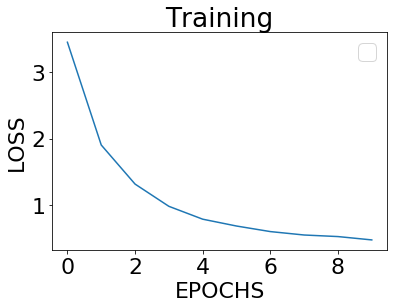

In [137]:
plt.plot([x for x in range(10)],history.history['loss'],marker='o')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.title("Training")
plt.show()

# Accuracy

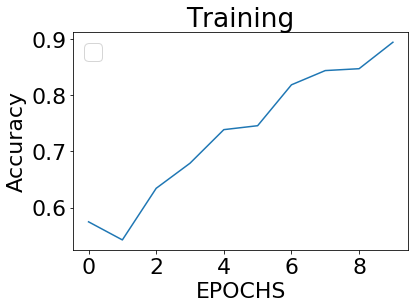

In [139]:
plt.plot([x for x in range(10)],history.history['acc'],marker='o')
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training")
plt.show()